In [ ]:
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.layers import Dense,Flatten, Dropout
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

train = ImageDataGenerator(rescale = 1./255,
                           width_shift_range=0.2,
                           rotation_range=40,
                           shear_range=0.2,
                           height_shift_range=0.2,
                           zoom_range=0.2,
                           fill_mode='nearest',
                           horizontal_flip=True)
validation = ImageDataGenerator(rescale = 1./255)

train_data = train.flow_from_directory('/content/drive/MyDrive/AI/VietnamFood/Trainning',
                                       target_size = (100,100),
                                       class_mode = 'categorical')
validation_dataset = train.flow_from_directory('/content/drive/MyDrive/AI/VietnamFood/Validation',
                                       target_size = (100,100),
                                       class_mode = 'categorical')

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
Dropout(0.3)
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_data,epochs=30,batch_size=128,validation_data=validation_dataset,verbose=1)

173/173 [==============================] - 228s 1s/step - loss: 1.1969 - accuracy: 0.5955 - val_loss: 1.3562 - val_accuracy: 0.5297
Epoch 21/40
173/173 [==============================] - 227s 1s/step - loss: 1.1759 - accuracy: 0.6089 - val_loss: 1.2682 - val_accuracy: 0.5676
Epoch 22/40
173/173 [==============================] - 227s 1s/step - loss: 1.1594 - accuracy: 0.6061 - val_loss: 1.2999 - val_accuracy: 0.5601
Epoch 23/40
173/173 [==============================] - 225s 1s/step - loss: 1.1398 - accuracy: 0.6107 - val_loss: 1.2981 - val_accuracy: 0.5537
Epoch 24/40
173/173 [==============================] - 233s 1s/step - loss: 1.1128 - accuracy: 0.6217 - val_loss: 1.2508 - val_accuracy: 0.5702
Epoch 25/40
173/173 [==============================] - 228s 1s/step - loss: 1.0909 - accuracy: 0.6291 - val_loss: 1.3265 - val_accuracy: 0.5676
Epoch 26/40
173/173 [==============================] - 229s 1s/step - loss: 1.0884 - accuracy: 0.6354 - val_loss: 1.2333 - val_accuracy: 0.5879
Epoc

In [ ]:
-from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 20000)             0         
                                                                 
 dense_8 (Dense)             (None, 256)              

In [ ]:
score = model.evaluate(validation_dataset,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  1.2352898120880127
độ chính xác kiểm tra là:  0.6068267822265625


In [ ]:
train_data.class_indices

{'Banh can': 0,
 'Banh chung': 1,
 'Banh gio': 2,
 'Banh mi': 3,
 'Banh trang nuong': 4,
 'Bun thit nuong': 5,
 'Canh chua': 6,
 'Com tam': 7,
 'Goi cuon': 8,
 'Xoi xeo': 9}

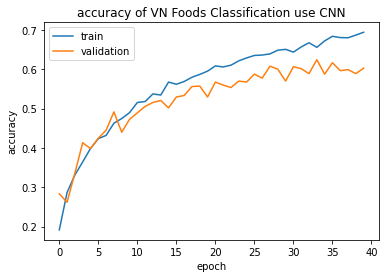

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of VN Foods Classification use CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/AI/VNFood_Classification_CNN.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/AI/VNFood_Classification_CNN.h5')

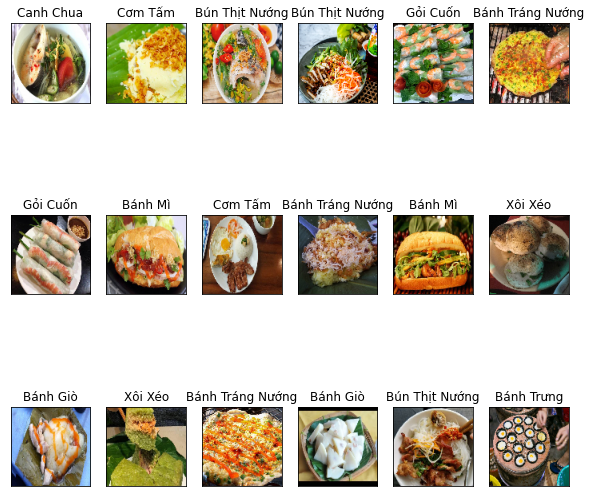

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
names = ['Bánh Căn','Bánh Trưng','Bánh Giò','Bánh Mì','Bánh Tráng Nướng','Bún Thịt Nướng','Canh Chua','Cơm Tấm','Gỏi Cuốn','Xôi Xéo']
dir = '/content/drive/MyDrive/AI/VietnamFood/Testing'
plt.figure(figsize=(10,10))
for i in range(18):
  plt.subplot(3,6,i + 1)
  img = load_img(dir +'/'+ str(i)+'.jpg', target_size=(100,100))
  plt.imshow(img)
  img = img_to_array(img)
  img = img.reshape(1,100,100,3)
  image = img/255.0
  plt.xticks([])
  plt.yticks([])
  plt.title(names[np.argmax(model.predict(image))])